In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [16]:
computers = pd.read_csv('Course Materials/Data/Computers.csv')

In [17]:
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [18]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


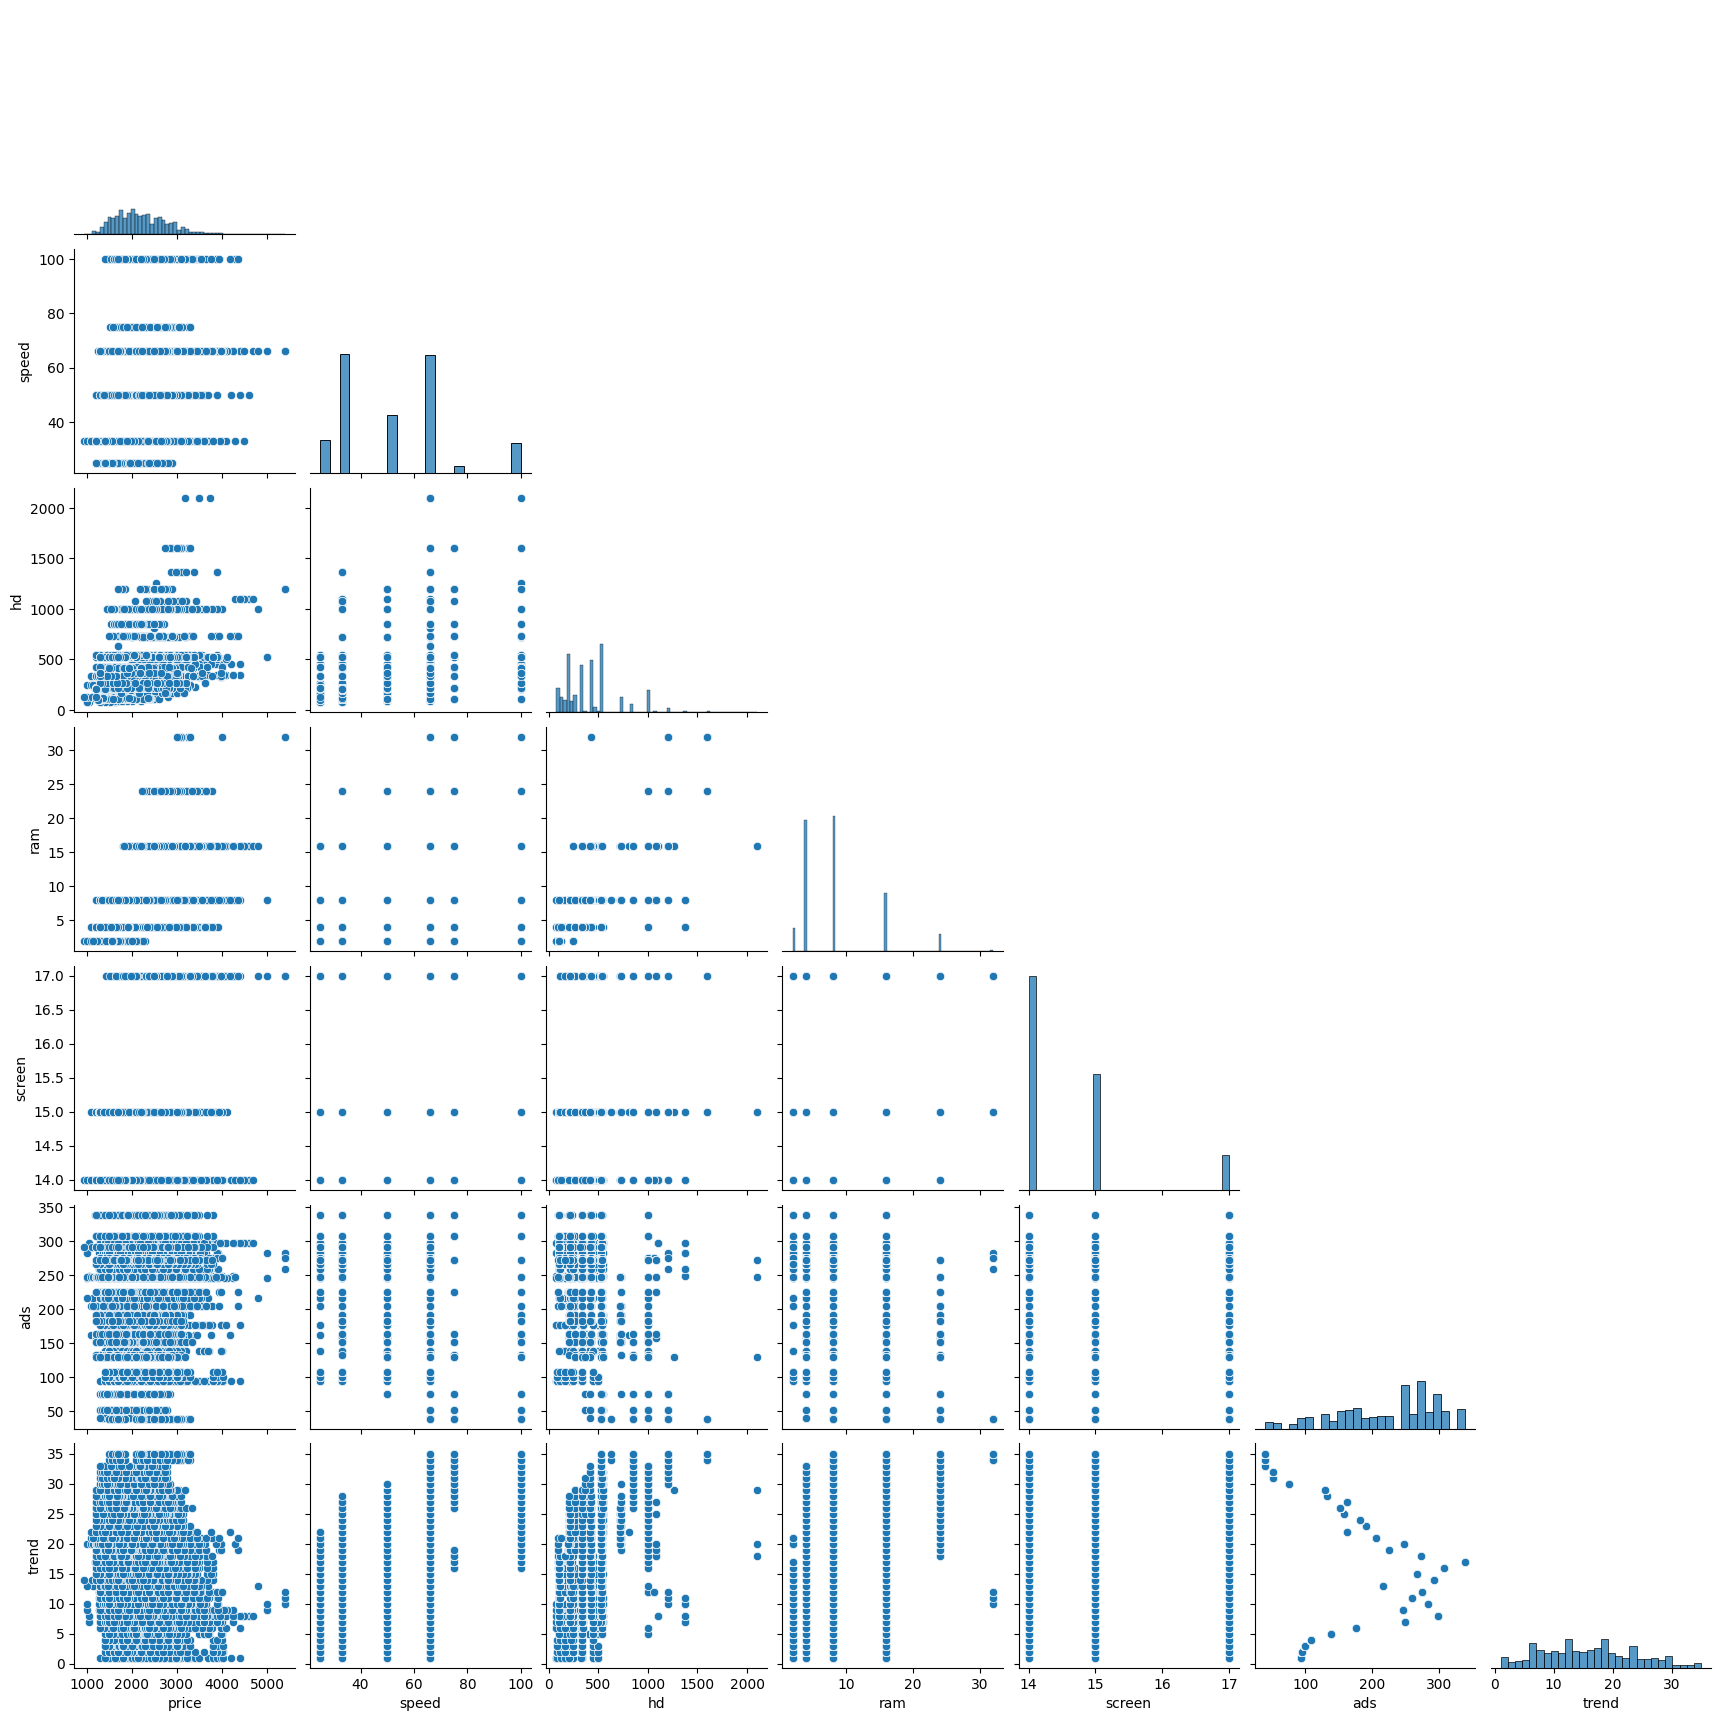

In [19]:
sns.pairplot(computers, corner=True)

<Axes: xlabel='ads', ylabel='Count'>

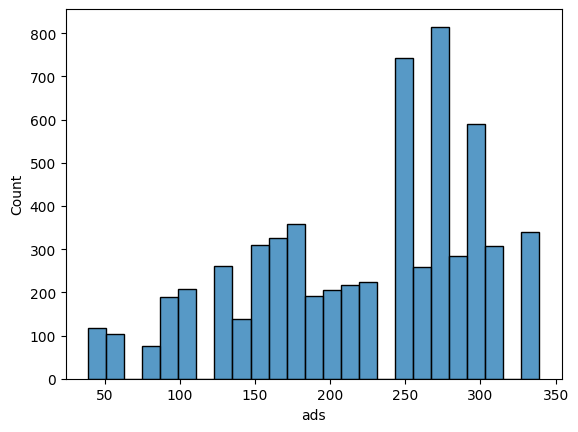

In [20]:
sns.histplot(computers['ads'])

In [21]:
cols = ['ram','speed','hd','screen','ads','trend']
        
X = sm.add_constant(computers[cols]) # treino
y = computers['price'] # target

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:40:38   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
ram           47.3870      1.188     39.899      0.000      45.059      49.715
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

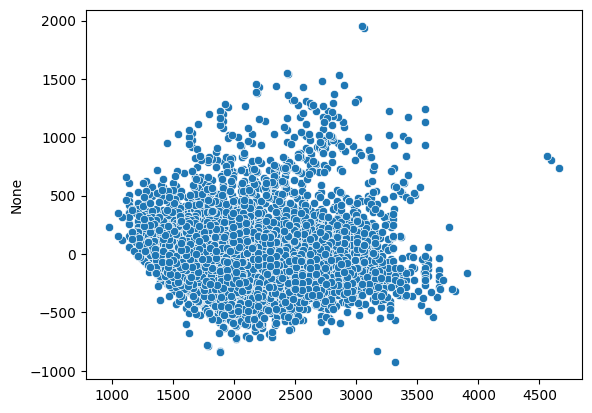

In [22]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [23]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse

In [24]:
print(cols)
print(f'MAE: {mae(y, model.predict())}')
print(f'RMSE: {rmse(y, model.predict())}')

['ram', 'speed', 'hd', 'screen', 'ads', 'trend']
MAE: 225.56322586626817
RMSE: 311.5017500706834
